In [1]:
#Under this we will plot for internaltional tourism arival in india yearly from 1991 to 2022 (Table 16)

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [10]:
#Collecting data from table 16 of the file 
df = pd.read_excel("Data from 2019-2022 excel files (copy)/Tourism-Statistics-for-year-2022.xlsx", sheet_name = "Table 16", skiprows = 2)

In [11]:
#restructuring the column names

df.columns = ["Year","Not Needed","Not Needed","Not Needed","Not Needed","% share of India","rank of india"]

In [12]:
#droping the columns whtat are not Needed

df = df.drop("Not Needed", axis = 1 )

In [14]:
# Droping the las NaN line 

df = df.dropna()

In [27]:
#Switching the 2022(P) to just 2022

df.iloc[21, 0] = int(2022)

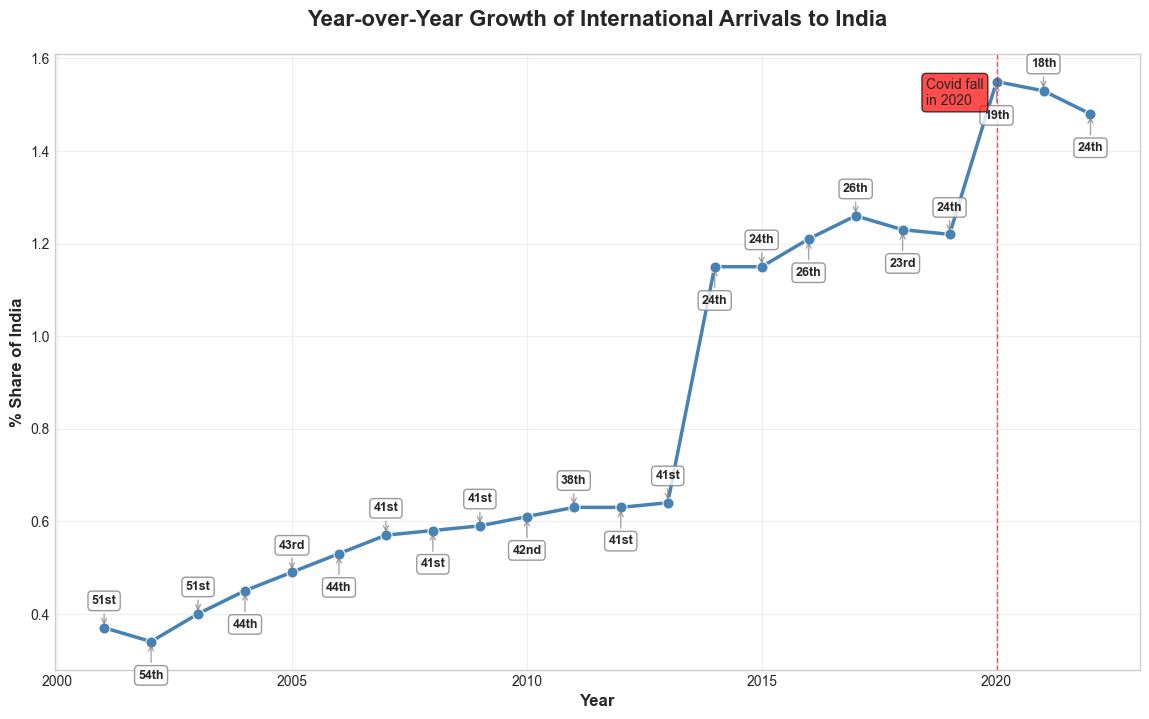

In [74]:
# Set the style for better appearance
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(14, 8))

# Create the line plot with circular markers
sns.lineplot(x="Year", y="% share of India", data=df, 
             marker='o', markersize=8, linewidth=2.5, color='steelblue')

plt.title('Year-over-Year Growth of International Arrivals to India', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('% Share of India', fontsize=12, fontweight='bold')

# Extract data for annotations
Growth = df["% share of India"]
Year = df["Year"]
Rank = df["rank of india"]

# Add annotations with better positioning
for i in range(len(df)):
    # Alternate annotation positions to avoid overlap
    if i % 2 == 0:
        xytext_offset = (0, 15)  # Above the point
        va_align = 'bottom'
    else:
        xytext_offset = (0, -20)  # Below the point
        va_align = 'top'
    
    plt.annotate(f'{Rank[i]}', 
                xy=(Year[i], Growth[i]),
                xytext=xytext_offset,
                textcoords='offset points',
                ha='center',
                va=va_align,
                fontsize=9,
                fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', 
                         facecolor='white', 
                         edgecolor='gray',
                         alpha=0.8),
                arrowprops=dict(arrowstyle='->', 
                               color='gray', 
                               lw=1,
                               alpha=0.7))

# Highlight downfall 
plt.axvline(x=2020, color='red', linestyle='--', alpha=0.7, linewidth=1)
plt.text(2018.5, 1.5, 'Covid fall\nin 2020', fontsize=10, 
         bbox=dict(boxstyle='round,pad=0.3', facecolor='red', alpha=0.7))

# Customize the plot
plt.grid(True, alpha=0.3)
plt.tight_layout

# Save with professional quality settings
plt.savefig('International arrival to India form 2001-2022.png', 
            dpi=300,                    # High resolution
            bbox_inches='tight',        # Remove extra whitespace
            facecolor='white',          # White background
            edgecolor='none',           # No border
            pad_inches=0.1)  